# **Práctica 2: ACP y ACD en fuente de datos propia**

Nombres: Ugalde Velasco Armando, Santiago Gutiérrez Diego

No. Cuenta: 317005435, 317126325

Email: armauv@gmail.com, diego.santiago.gutierrez.uwu@gmail.com

**Objetivo.** Realizar una selección de características a través de Análisis de Componentes Principales (ACP) y Análisis Correlacional de Datos (ACD).

**Fuente de datos**

* 1) DBNOs - Número de jugadores enemigos noqueados.
* 2) assists - Número de jugadores enemigos dañados por este jugador que fueron * eliminados por sus compañeros de equipo.
* 3) boosts - Número de objetos de refuerzo utilizados.
* 4) damageDealt - Daño total infligido. Nota: se resta el daño autoinfligido.
* 5) headshotKills - Número de jugadores enemigos eliminados con disparos a la cabeza.
* 6) heals - Número de objetos de curación utilizados.
* 7) Id - ID del jugador.
* 8) killPlace - Posición en la que quedó el jugador en función del número de jugadores enemigos eliminados.
* 9) killPoints - Clasificación externa basada en las eliminaciones del jugador. (Piensa en esto como una clasificación Elo donde solo las eliminaciones importan). Si hay un valor distinto de -1 en rankPoints, entonces cualquier 0 en killPoints debe tratarse como "Ninguno".
* 10) killStreaks - Máximo número de jugadores enemigos eliminados en un corto período de tiempo.
* 11) kills - Número de jugadores enemigos eliminados.
* 12) longestKill - La distancia más larga entre el jugador y el jugador eliminado en el momento de la muerte. Esto puede ser engañoso, ya que derribar a un jugador y alejarse en un vehículo puede dar lugar a una estadística de longestKill muy alta.
* 13) matchDuration - Duración del partido en segundos.
* 14) matchId - ID para identificar el partido. No hay partidos que estén tanto en el conjunto de entrenamiento como en el de prueba.
* 15) matchType - Cadena que identifica el modo de juego del que provienen los datos. Los modos estándar son "solo", "duo", "squad", "solo-fpp", "duo-fpp" y "squad-fpp"; otros modos son de eventos o partidos personalizados.
* 16) rankPoints - Clasificación similar a Elo del jugador. Esta clasificación es inconsistente y se está eliminando en la próxima versión de la API, así que úsala con precaución. El valor de -1 ocupa el lugar de "Ninguno".
* 17) revives - Número de veces que este jugador revivió a compañeros de equipo.
* 18) rideDistance - Distancia total recorrida en vehículos medida en metros.
* 19) roadKills - Número de eliminaciones mientras se está en un vehículo.
* 20) swimDistance - Distancia total recorrida nadando medida en metros.
* 21) teamKills - Número de veces que este jugador eliminó a un compañero de equipo.
* 22) vehicleDestroys - Número de vehículos destruidos.
* 23) walkDistance - Distancia total recorrida a pie medida en metros.
* 24) weaponsAcquired - Número de armas recogidas.
* 25) winPoints - Clasificación externa basada en las victorias del jugador. (Piensa en esto como una clasificación
* 26) groupId - ID para identificar un grupo dentro de una partida. Si el mismo grupo de jugadores juega en diferentes partidas, tendrán un groupId diferente cada vez.
* 27) numGroups - Número de grupos para los cuales tenemos datos en la partida.
* 28) maxPlace - Peor posición para la cual tenemos datos en la partida. Esto puede no coincidir con numGroups, ya que a veces se omiten datos de posiciones.
* 29) winPlacePerc - El objetivo de la predicción. Esta es una ubicación de victoria en percentil, donde 1 corresponde al primer lugar y 0 corresponde al último lugar en la partida. Se calcula en función de maxPlace, no de numGroups, por lo que es posible que falten fragmentos en una partida.

### **Importar las bibliotecas y los datos**

In [70]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para la generación de gráficas a partir de los datos
import seaborn as sns                       # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [71]:
url = "https://raw.githubusercontent.com/armandouv/PUBG-Finish-Placement-Prediction-Dataset/master/sampled_data.csv"
DatosPUBG = pd.read_csv(url)
DatosPUBG

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,93e57670813f8e,f657902761e60c,b069f2b87d75f9,0,0,50.31,0,0,0,48,...,0,0.00,0,181.5,0,0,1676.0,5,0,0.8125
1,89604bf95ea5a2,1dbf697dad19e4,f2672978cc29d6,0,1,386.20,1,0,1,9,...,0,0.00,0,0.0,0,0,2026.0,6,0,0.7111
2,6f609b3e78df51,9fc1a2628c980a,8e6aee43c09e08,0,0,0.00,0,0,0,84,...,0,0.00,0,0.0,0,0,0.0,0,0,0.0000
3,fab9d9a7726b60,115a85181a2a0b,84bf0c2075b8b7,0,1,0.00,0,0,4,61,...,0,86.49,0,0.0,0,0,1053.0,3,0,0.4211
4,fb5c522cb1a9eb,f02bf0eeac85ea,86032b4e374c74,0,8,29.83,0,0,2,41,...,0,0.00,0,0.0,0,0,2052.0,5,0,0.9231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,814200dbade35f,80c62d4d7ea4e8,6b3d9e7b3bc05f,0,0,17.50,1,0,0,37,...,1,0.00,0,0.0,0,0,130.8,2,0,0.2708
599996,66407ef9c6d379,44eec82cf4efe6,d34ab2809eb54e,0,2,190.80,0,0,2,51,...,0,5165.00,0,0.0,0,0,1898.0,4,1525,0.5926
599997,90c2466c166eca,80e4d7e8b7d673,b10e7433fd984c,0,2,0.00,0,0,2,47,...,0,422.20,0,0.0,0,0,1869.0,6,0,0.7021
599998,ab61160ec7e4d3,698e742f558bd3,2a28cb49734790,0,1,0.00,0,0,1,50,...,2,852.20,0,0.0,0,0,2972.0,7,0,0.8846


## **I. Análisis de componentes principales (ACP)**

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

#### **Paso 1:** Hay evidencia de variables posiblemente correlacionadas.

In [72]:
CorrDatosPUBG = DatosPUBG.corr(method='pearson')
CorrDatosPUBG

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.306190,0.408154,0.301829,0.197735,0.229220,-0.290068,0.039375,0.321687,0.244214,...,0.197234,0.111066,0.014634,0.023199,0.006615,0.057942,0.289138,0.246821,0.024164,0.298760
boosts,0.306190,1.000000,0.520376,0.360138,0.331758,0.536082,-0.555098,0.009637,0.500320,0.404988,...,0.253583,0.328725,0.035547,0.106188,0.009265,0.087313,0.641957,0.405867,-0.006535,0.635414
damageDealt,0.408154,0.520376,1.000000,0.734329,0.613756,0.345938,-0.677450,0.051016,0.888792,0.704257,...,0.257780,0.143025,0.055745,0.033202,0.017120,0.083906,0.397307,0.354917,0.019005,0.440581
DBNOs,0.301829,0.360138,0.734329,1.000000,0.464939,0.269185,-0.556495,0.042445,0.706371,0.646261,...,0.304916,0.104406,0.034547,0.015234,0.068570,0.060729,0.285014,0.217118,0.010709,0.280947
headshotKills,0.197735,0.331758,0.613756,0.464939,1.000000,0.199288,-0.468002,0.021835,0.675488,0.515032,...,0.149812,0.077398,0.014114,0.025610,0.009227,0.040349,0.248771,0.217415,0.003042,0.276951
heals,0.229220,0.536082,0.345938,0.269185,0.199288,1.000000,-0.386957,-0.000730,0.313658,0.271492,...,0.238892,0.296281,0.024050,0.077098,0.033499,0.060842,0.431151,0.310436,-0.009686,0.428354
killPlace,-0.290068,-0.555098,-0.677450,-0.556495,-0.468002,-0.386957,1.000000,-0.024178,-0.730192,-0.810169,...,-0.270359,-0.236673,-0.056777,-0.088925,-0.037258,-0.072815,-0.590447,-0.490739,-0.003523,-0.719147
killPoints,0.039375,0.009637,0.051016,0.042445,0.021835,-0.000730,-0.024178,1.000000,0.036889,0.037071,...,0.012471,-0.026054,-0.002458,-0.006169,-0.040721,-0.006219,0.005640,-0.002219,0.983456,0.014463
kills,0.321687,0.500320,0.888792,0.706371,0.675488,0.313658,-0.730192,0.036889,1.000000,0.802815,...,0.252284,0.116707,0.066637,0.035303,0.017909,0.082225,0.374408,0.339116,0.007865,0.420471
killStreaks,0.244214,0.404988,0.704257,0.646261,0.515032,0.271492,-0.810169,0.037071,0.802815,1.000000,...,0.240404,0.100449,0.071343,0.034264,0.027671,0.066663,0.327941,0.277134,0.008798,0.378204


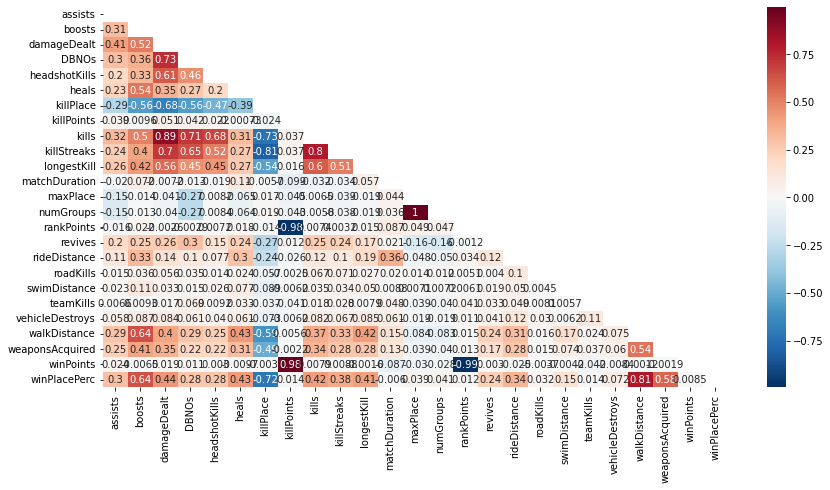

In [73]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrDatosPUBG)
sns.heatmap(CorrDatosPUBG, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

#### **Paso 2:** Se hace una estandarización de los datos

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Estandarizar = StandardScaler()                                  # Se instancia el objeto StandardScaler o MinMaxScaler 
NuevaMatriz = DatosPUBG.select_dtypes(include=['number'])    # Se quitan las variables nominales
MEstandarizada = Estandarizar.fit_transform(NuevaMatriz)         # Se calculan la media y desviación para cada variable, y se escalan los datos

In [75]:
pd.DataFrame(MEstandarizada, columns=NuevaMatriz.columns)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,-0.397032,-0.645423,-0.470934,-0.575659,-0.375479,-0.511143,0.014829,-0.805474,-0.593458,-0.764957,...,-0.349129,-0.403169,-0.047397,5.799469,-0.142117,-0.084792,0.439912,0.543178,-0.820550,1.105335
1,-0.397032,-0.062242,1.489250,0.296195,-0.375479,-0.138269,-1.403703,-0.805474,1.324040,2.039745,...,-0.349129,-0.403169,-0.047397,-0.148064,-0.142117,-0.084792,0.735384,0.948729,-0.820550,0.775630
2,-0.397032,-0.645423,-0.764533,-0.575659,-0.375479,-0.511143,1.324244,-0.805474,-0.593458,-0.764957,...,-0.349129,-0.403169,-0.047397,-0.148064,-0.142117,-0.084792,-0.974978,-1.484576,-0.820550,-1.536528
3,-0.397032,-0.062242,-0.764533,-0.575659,-0.375479,0.980354,0.487674,-0.805474,-0.593458,-0.764957,...,-0.349129,-0.345169,-0.047397,-0.148064,-0.142117,-0.084792,-0.086029,-0.267924,-0.820550,-0.167311
4,-0.397032,4.020028,-0.590451,-0.575659,-0.375479,0.234605,-0.239779,-0.805474,-0.593458,-0.764957,...,-0.349129,-0.403169,-0.047397,-0.148064,-0.142117,-0.084792,0.757333,0.543178,-0.820550,1.464954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,-0.397032,-0.645423,-0.662406,0.296195,-0.375479,-0.511143,-0.385269,-0.805474,0.045708,0.637394,...,1.755559,-0.403169,-0.047397,-0.148064,-0.142117,-0.084792,-0.864556,-0.673474,-0.820550,-0.656016
599996,-0.397032,0.520939,0.348936,-0.575659,-0.375479,0.234605,0.123947,1.490577,-0.593458,-0.764957,...,-0.349129,3.060462,-0.047397,-0.148064,-0.142117,-0.084792,0.627326,0.137627,1.240781,0.390325
599997,-0.397032,0.520939,-0.764533,-0.575659,-0.375479,0.234605,-0.021543,-0.805474,-0.593458,-0.764957,...,-0.349129,-0.120043,-0.047397,-0.148064,-0.142117,-0.084792,0.602844,0.948729,-0.820550,0.746367
599998,-0.397032,-0.062242,-0.764533,-0.575659,-0.375479,-0.138269,0.087575,-0.805474,-0.593458,-0.764957,...,3.860247,0.168313,-0.047397,-0.148064,-0.142117,-0.084792,1.534003,1.354279,-0.820550,1.339770


#### **Pasos 3 y 4:** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores)

In [76]:
pca = PCA(n_components=None)     # pca=PCA(n_components=None), pca=PCA(.85)
pca.fit(MEstandarizada)          # Se obtiene los componentes
print(pca.components_)

[[ 1.74235028e-01  2.78854950e-01  3.23699247e-01  2.70753473e-01
   2.35220611e-01  2.05919540e-01 -3.33278879e-01  1.43685954e-02
   3.25722219e-01  2.95660570e-01  2.59654797e-01  2.39670375e-02
  -4.18581920e-02 -4.16240980e-02  2.53002685e-03  1.45713894e-01
   1.27977281e-01  2.55287863e-02  4.26632357e-02  1.80277761e-02
   4.71802414e-02  2.67157899e-01  2.16614214e-01  4.40106286e-03
   2.80778064e-01]
 [-2.64797825e-02  2.70068997e-02 -2.10594740e-02 -3.56764138e-02
  -9.08416364e-03  2.60697268e-02 -6.82862659e-03 -5.66320706e-01
  -1.40194759e-02 -1.66341675e-02  5.74877714e-03  9.92301358e-02
   8.00472686e-02  7.86268593e-02  5.67858730e-01 -1.00706496e-02
   5.59963461e-02  7.79609526e-03  1.39986908e-02  3.61714626e-02
   1.51821188e-02  2.97553116e-02  2.79632001e-02 -5.67875729e-01
   2.71336562e-02]
 [ 1.08054769e-01 -1.00328264e-01  2.91167102e-02  2.27707925e-01
  -6.00359846e-03 -3.59543223e-02  6.29002189e-02 -7.82361840e-02
   6.39669854e-03  2.71201417e-02 -2.8

#### **Paso 5:** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [77]:
Varianza = pca.explained_variance_ratio_
print('Porporción de varianza:', Varianza)
print('Varianza acumulada:', sum(Varianza[0:9]))   
# Con 10 componentes se tiene un 76% de varianza total

Porporción de varianza: [2.71639642e-01 1.20271535e-01 8.52300347e-02 7.97854794e-02
 4.92109995e-02 4.15779190e-02 3.99019858e-02 3.84139864e-02
 3.59391053e-02 3.52615547e-02 3.21338204e-02 2.96857138e-02
 2.38053745e-02 2.28316576e-02 2.27824929e-02 1.90754861e-02
 1.61776811e-02 1.32469516e-02 8.43756034e-03 6.92509231e-03
 3.39565608e-03 3.00927569e-03 9.91267010e-04 1.91391569e-04
 7.83371297e-05]
Varianza acumulada: 0.7619706870644151


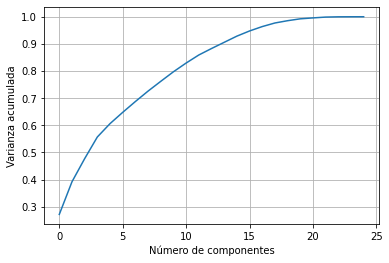

In [78]:
# Se grafica la varianza acumulada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 6:** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [79]:
print(pd.DataFrame(abs(pca.components_)))

          0         1         2         3         4         5         6   \
0   0.174235  0.278855  0.323699  0.270753  0.235221  0.205920  0.333279   
1   0.026480  0.027007  0.021059  0.035676  0.009084  0.026070  0.006829   
2   0.108055  0.100328  0.029117  0.227708  0.006004  0.035954  0.062900   
3   0.048941  0.191082  0.234820  0.218416  0.281352  0.237239  0.044581   
4   0.104512  0.091234  0.064753  0.110703  0.080938  0.015128  0.063819   
5   0.027865  0.006523  0.034935  0.023428  0.052818  0.044194  0.033557   
6   0.078046  0.020206  0.022089  0.018570  0.044916  0.075703  0.053245   
7   0.280050  0.078740  0.015582  0.069614  0.156799  0.101378  0.006860   
8   0.180304  0.016504  0.029870  0.068492  0.034185  0.098349  0.052346   
9   0.201171  0.078131  0.036906  0.077477  0.048043  0.268233  0.151327   
10  0.833176  0.018018  0.123843  0.006200  0.027236  0.032967  0.173821   
11  0.146890  0.333777  0.024154  0.002422  0.083188  0.667085  0.119810   
12  0.017164

In [80]:
CargasComponentes = pd.DataFrame(pca.components_, columns=NuevaMatriz.columns)
CargasComponentes

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.174235,0.278855,0.323699,0.270753,0.235221,0.205920,-0.333279,0.014369,0.325722,0.295661,...,0.145714,0.127977,0.025529,0.042663,0.018028,0.047180,0.267158,0.216614,0.004401,0.280778
1,-0.026480,0.027007,-0.021059,-0.035676,-0.009084,0.026070,-0.006829,-0.566321,-0.014019,-0.016634,...,-0.010071,0.055996,0.007796,0.013999,0.036171,0.015182,0.029755,0.027963,-0.567876,0.027134
2,0.108055,-0.100328,0.029117,0.227708,-0.006004,-0.035954,0.062900,-0.078236,0.006397,0.027120,...,0.142720,-0.073206,-0.024466,-0.062273,0.055157,0.004437,-0.093651,-0.093396,-0.091876,-0.173828
3,-0.048941,-0.191082,0.234820,0.218416,0.281352,-0.237239,-0.044581,-0.036024,0.291995,0.271586,...,-0.076919,-0.368526,-0.002275,-0.126999,-0.044936,-0.069344,-0.328982,-0.257323,-0.049686,-0.265728
4,-0.104512,-0.091234,0.064753,0.110703,0.080938,-0.015128,0.063819,0.041880,0.073154,0.062703,...,-0.029971,0.382072,0.267866,-0.224958,0.333882,0.399399,-0.187319,-0.105383,0.043302,-0.243204
5,-0.027865,0.006523,0.034935,0.023428,0.052818,0.044194,0.033557,-0.001008,0.028353,0.010617,...,-0.023430,0.224251,0.216416,-0.255128,-0.666581,-0.511056,-0.049962,-0.026567,-0.000017,-0.093749
6,-0.078046,-0.020206,-0.022089,-0.018570,-0.044916,-0.075703,-0.053245,-0.007852,0.007689,0.055999,...,-0.140461,-0.004081,0.834941,0.453999,-0.030927,0.025050,0.015080,-0.041290,-0.009392,0.051089
7,0.280050,0.078740,-0.015582,-0.069614,-0.156799,0.101378,0.006860,-0.012660,-0.055612,-0.061544,...,0.231813,-0.089312,0.367463,-0.705375,0.011255,0.158227,0.002757,0.061067,-0.015300,0.103313
8,0.180304,0.016504,0.029870,-0.068492,0.034185,-0.098349,0.052346,-0.012851,0.010600,-0.051254,...,-0.286184,0.014901,-0.117737,0.048069,-0.592976,0.688219,0.013635,-0.014913,-0.014708,0.002162
9,0.201171,0.078131,0.036906,0.077477,-0.048043,0.268233,0.151327,0.003188,-0.006231,-0.050277,...,0.695633,0.001150,-0.001317,0.349887,-0.181105,0.119179,-0.143600,-0.316292,0.000323,-0.162948


In [81]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=NuevaMatriz.columns)
CargasComponentes

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0.174235,0.278855,0.323699,0.270753,0.235221,0.205920,0.333279,0.014369,0.325722,0.295661,...,0.145714,0.127977,0.025529,0.042663,0.018028,0.047180,0.267158,0.216614,0.004401,0.280778
1,0.026480,0.027007,0.021059,0.035676,0.009084,0.026070,0.006829,0.566321,0.014019,0.016634,...,0.010071,0.055996,0.007796,0.013999,0.036171,0.015182,0.029755,0.027963,0.567876,0.027134
2,0.108055,0.100328,0.029117,0.227708,0.006004,0.035954,0.062900,0.078236,0.006397,0.027120,...,0.142720,0.073206,0.024466,0.062273,0.055157,0.004437,0.093651,0.093396,0.091876,0.173828
3,0.048941,0.191082,0.234820,0.218416,0.281352,0.237239,0.044581,0.036024,0.291995,0.271586,...,0.076919,0.368526,0.002275,0.126999,0.044936,0.069344,0.328982,0.257323,0.049686,0.265728
4,0.104512,0.091234,0.064753,0.110703,0.080938,0.015128,0.063819,0.041880,0.073154,0.062703,...,0.029971,0.382072,0.267866,0.224958,0.333882,0.399399,0.187319,0.105383,0.043302,0.243204
5,0.027865,0.006523,0.034935,0.023428,0.052818,0.044194,0.033557,0.001008,0.028353,0.010617,...,0.023430,0.224251,0.216416,0.255128,0.666581,0.511056,0.049962,0.026567,0.000017,0.093749
6,0.078046,0.020206,0.022089,0.018570,0.044916,0.075703,0.053245,0.007852,0.007689,0.055999,...,0.140461,0.004081,0.834941,0.453999,0.030927,0.025050,0.015080,0.041290,0.009392,0.051089
7,0.280050,0.078740,0.015582,0.069614,0.156799,0.101378,0.006860,0.012660,0.055612,0.061544,...,0.231813,0.089312,0.367463,0.705375,0.011255,0.158227,0.002757,0.061067,0.015300,0.103313
8,0.180304,0.016504,0.029870,0.068492,0.034185,0.098349,0.052346,0.012851,0.010600,0.051254,...,0.286184,0.014901,0.117737,0.048069,0.592976,0.688219,0.013635,0.014913,0.014708,0.002162
9,0.201171,0.078131,0.036906,0.077477,0.048043,0.268233,0.151327,0.003188,0.006231,0.050277,...,0.695633,0.001150,0.001317,0.349887,0.181105,0.119179,0.143600,0.316292,0.000323,0.162948


In [82]:
# Se crea una columna extra isTop20 que determina si el jugador está en el top 20 de la partida
# Compute the rank of each player within each match based on maxPlace and winPlacePerc
DatosPUBG['rank'] = DatosPUBG.groupby('matchId')['winPlacePerc'].apply(lambda x: (x * (DatosPUBG.loc[x.index, 'maxPlace'] - 1) + 1).astype(int)).astype(int)

# Create a new column isTop50 based on rank
DatosPUBG['isTop20'] = DatosPUBG['rank'] <= 20

# Map True/False values to 'Yes'/'No'
DatosPUBG['isTop20'] = DatosPUBG['isTop20'].map({True: 'Yes', False: 'No'})

In [83]:
#DatosPUBGACP = DatosPUBG.drop(columns=[])
#DatosPUBGACP

# Get loadings matrix from PCA
loadings = pd.DataFrame(pca.components_, columns=NuevaMatriz.columns)

# Calculate absolute values of loadings
abs_loadings = np.abs(loadings)

# Sum absolute values by column
sum_loadings = abs_loadings.sum(axis=0)

# Sort columns by sum of loadings in descending order
sorted_columns = sum_loadings.sort_values(ascending=False).index

# Choose the top n columns with the highest loadings
n_components = 10  # Change this to the number of components you want to keep
selected_columns = sorted_columns[:n_components]

# Drop columns with lower loadings
DatosPUBGACP = DatosPUBG[selected_columns]
DatosPUBGACP['isTop20'] = DatosPUBG['isTop20']
DatosPUBGACP


<ipython-input-83-4a3989bbd258>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DatosPUBGACP['isTop20'] = DatosPUBG['isTop20']


,winPlacePerc,matchDuration,weaponsAcquired,killStreaks,walkDistance,killPlace,boosts,DBNOs,heals,headshotKills,isTop20
0,0.8125,1457,5,0,1676.0,48,0,0,0,0,No
1,0.7111,1404,6,2,2026.0,9,1,1,1,0,No
2,0.0000,1385,0,0,0.0,84,0,0,0,0,Yes
3,0.4211,1944,3,0,1053.0,61,1,0,4,0,No
4,0.9231,1317,5,0,2052.0,41,8,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...
599995,0.2708,1385,2,1,130.8,37,0,1,0,0,Yes
599996,0.5926,1790,4,0,1898.0,51,2,0,2,0,Yes
599997,0.7021,1374,6,0,1869.0,47,2,0,2,0,No
599998,0.8846,1312,7,0,2972.0,50,1,0,1,0,No


## **II. Análisis correlacional de datos (ACD)**

 **Evaluación visual**

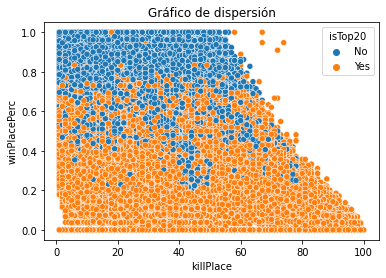

In [84]:
sns.scatterplot(x='killPlace', y ='winPlacePerc', data=DatosPUBG, hue='isTop20')
plt.title('Gráfico de dispersión')
plt.xlabel('killPlace')
plt.ylabel('winPlacePerc')
plt.show()

In [85]:
CorrDatosPUBG = DatosPUBG.corr(method='pearson')
CorrDatosPUBG

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,rank
assists,1.000000,0.306190,0.408154,0.301829,0.197735,0.229220,-0.290068,0.039375,0.321687,0.244214,...,0.111066,0.014634,0.023199,0.006615,0.057942,0.289138,0.246821,0.024164,0.298760,0.076231
boosts,0.306190,1.000000,0.520376,0.360138,0.331758,0.536082,-0.555098,0.009637,0.500320,0.404988,...,0.328725,0.035547,0.106188,0.009265,0.087313,0.641957,0.405867,-0.006535,0.635414,0.438843
damageDealt,0.408154,0.520376,1.000000,0.734329,0.613756,0.345938,-0.677450,0.051016,0.888792,0.704257,...,0.143025,0.055745,0.033202,0.017120,0.083906,0.397307,0.354917,0.019005,0.440581,0.287522
DBNOs,0.301829,0.360138,0.734329,1.000000,0.464939,0.269185,-0.556495,0.042445,0.706371,0.646261,...,0.104406,0.034547,0.015234,0.068570,0.060729,0.285014,0.217118,0.010709,0.280947,-0.013415
headshotKills,0.197735,0.331758,0.613756,0.464939,1.000000,0.199288,-0.468002,0.021835,0.675488,0.515032,...,0.077398,0.014114,0.025610,0.009227,0.040349,0.248771,0.217415,0.003042,0.276951,0.211593
heals,0.229220,0.536082,0.345938,0.269185,0.199288,1.000000,-0.386957,-0.000730,0.313658,0.271492,...,0.296281,0.024050,0.077098,0.033499,0.060842,0.431151,0.310436,-0.009686,0.428354,0.246404
killPlace,-0.290068,-0.555098,-0.677450,-0.556495,-0.468002,-0.386957,1.000000,-0.024178,-0.730192,-0.810169,...,-0.236673,-0.056777,-0.088925,-0.037258,-0.072815,-0.590447,-0.490739,-0.003523,-0.719147,-0.504450
killPoints,0.039375,0.009637,0.051016,0.042445,0.021835,-0.000730,-0.024178,1.000000,0.036889,0.037071,...,-0.026054,-0.002458,-0.006169,-0.040721,-0.006219,0.005640,-0.002219,0.983456,0.014463,-0.017248
kills,0.321687,0.500320,0.888792,0.706371,0.675488,0.313658,-0.730192,0.036889,1.000000,0.802815,...,0.116707,0.066637,0.035303,0.017909,0.082225,0.374408,0.339116,0.007865,0.420471,0.298805
killStreaks,0.244214,0.404988,0.704257,0.646261,0.515032,0.271492,-0.810169,0.037071,0.802815,1.000000,...,0.100449,0.071343,0.034264,0.027671,0.066663,0.327941,0.277134,0.008798,0.378204,0.236716


In [86]:
print(CorrDatosPUBG['killPlace'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores 

killPlace          1.000000
numGroups          0.019275
maxPlace           0.017270
winPoints         -0.003523
matchDuration     -0.005692
rankPoints        -0.013789
killPoints        -0.024178
teamKills         -0.037258
roadKills         -0.056777
vehicleDestroys   -0.072815
Name: killPlace, dtype: float64 



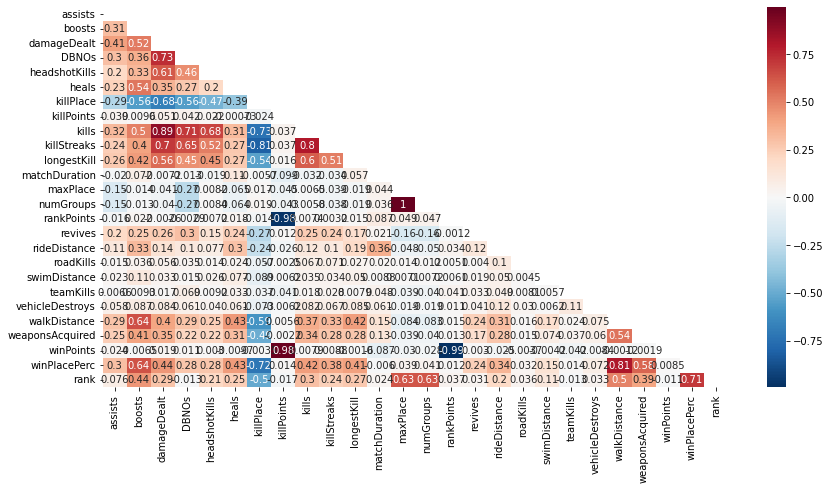

In [87]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrDatosPUBG)
sns.heatmap(CorrDatosPUBG, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

1) winPlacePer

2) matchDuration

3) weaponsAcquired

4) killStreaks

5) walkDistance

6) killPlace

7) boosts

8) DBNOs

9) heals

10) headshotKills

In [88]:
DatosPUBGACD = DatosPUBG[ ['winPlacePerc', 'matchDuration','weaponsAcquired', 'killStreaks',
                         'walkDistance', 'killPlace', 'boosts', 'DBNOs', 'heals', 'headshotKills'] ]
DatosPUBGACD 

,winPlacePerc,matchDuration,weaponsAcquired,killStreaks,walkDistance,killPlace,boosts,DBNOs,heals,headshotKills
0,0.8125,1457,5,0,1676.0,48,0,0,0,0
1,0.7111,1404,6,2,2026.0,9,1,1,1,0
2,0.0000,1385,0,0,0.0,84,0,0,0,0
3,0.4211,1944,3,0,1053.0,61,1,0,4,0
4,0.9231,1317,5,0,2052.0,41,8,0,2,0
...,...,...,...,...,...,...,...,...,...,...
599995,0.2708,1385,2,1,130.8,37,0,1,0,0
599996,0.5926,1790,4,0,1898.0,51,2,0,2,0
599997,0.7021,1374,6,0,1869.0,47,2,0,2,0
599998,0.8846,1312,7,0,2972.0,50,1,0,1,0
